In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("../../Data/Jeju/201901-202003.csv")
data = data.fillna('')

In [4]:
city_sum = data.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM'])['AMT'].sum().reset_index(name = 'AMT')

In [5]:
city_sum.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,201901,강원,건강보조식품 소매업,148354746
1,201901,강원,골프장 운영업,1229200312
2,201901,강원,과실 및 채소 소매업,1286979106
3,201901,강원,관광 민예품 및 선물용품 소매업,30656770
4,201901,강원,그외 기타 스포츠시설 운영업,13101500


## 2. EDA 

## 지역별, 산업별로 지역민의 소비와 관광객의 소비 비율 확인해보자

In [6]:
t = data[data['REG_YYMM']<202001].groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM'])['AMT'].sum().reset_index()
r = t.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['AMT'].agg(['mean','std']).reset_index()
t = t.merge(r, left_on = ['CARD_SIDO_NM','STD_CLSS_NM'],right_on = ['CARD_SIDO_NM','STD_CLSS_NM'], how = 'left')

## 19년 평균에서 표준편차 범위 밖에 있으면 코로나 영향 받았다 생각

In [7]:
min_max = t[['CARD_SIDO_NM','STD_CLSS_NM','mean','std']].drop_duplicates().sort_values(by = 'STD_CLSS_NM').dropna()
min_max['max'] = min_max['mean'] + min_max['std']
min_max['min'] = min_max['mean'] - min_max['std']
min_max.drop(['mean','std'],axis = 1,inplace = True)
min_max.set_index(['CARD_SIDO_NM','STD_CLSS_NM'],inplace = True)

In [54]:
data03 = city_sum[city_sum['REG_YYMM']==202003].drop('REG_YYMM',axis =1).set_index(['CARD_SIDO_NM','STD_CLSS_NM'])
min_max_index = list(min_max.index)
data03_index = list(data03.index)

lst =[]
for i in data03_index:
    if min_max.loc[i]['min'] < data03.loc[i]['AMT'] < min_max.loc[i]['max']:
        lst.append('0')
    else:
        lst.append('1')
data03['affected'] = lst

In [57]:
data03.to_csv("temp.csv")
data = pd.read_csv("temp.csv")

In [68]:
# 한글 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'

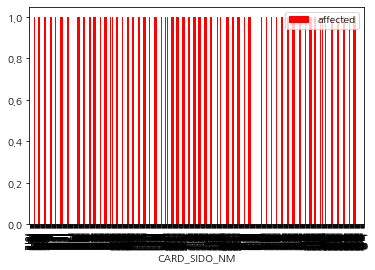

In [71]:
data.plot(x='CARD_SIDO_NM', y='affected', kind='bar', color='r')

In [69]:
location = data.CARD_SIDO_NM.unique()
sns.barplot(x=location, y=data.STD_CLSS_NM, hue='affected', data=data)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
data.plot(x='CARD_SIDO_NM', y='count',kind='bar', color='r', alpha=0.5)
data.plot(x='seller_location_1', y='count', ax=ax2[0], label='seller', kind='bar', alpha=0.5)

In [50]:
data

,CARD_SIDO_NM,STD_CLSS_NM,AMT,affected
0,강원,건강보조식품 소매업,96059012,x
1,강원,골프장 운영업,2915797995,x
2,강원,과실 및 채소 소매업,994816943,x
3,강원,관광 민예품 및 선물용품 소매업,13317300,o
4,강원,그외 기타 스포츠시설 운영업,2075000,o
...,...,...,...,...
604,충북,피자 햄버거 샌드위치 및 유사 음식점업,1315245299,o
605,충북,한식 음식점업,16152482704,o
606,충북,호텔업,15248550,o
607,충북,화장품 및 방향제 소매업,428881434,o


In [39]:
# 지역별 영향 받은 업종 수

data03.index.get_level_values('충북')

KeyError: 'Level 충북 not found'

In [9]:
data03[data03['affected']=='x'].reset_index().groupby('STD_CLSS_NM').count().sort_values(by = 'CARD_SIDO_NM',ascending = False)

,CARD_SIDO_NM,AMT,affected
STD_CLSS_NM,,,
골프장 운영업,16,16,16
건강보조식품 소매업,15,15,15
체인화 편의점,13,13,13
수산물 소매업,13,13,13
그외 기타 종합 소매업,11,11,11
과실 및 채소 소매업,10,10,10
빵 및 과자류 소매업,10,10,10
차량용 가스 충전업,9,9,9
여행사업,6,6,6


In [13]:
data03[data03['affected']=='x'].reset_index().groupby('CARD_SIDO_NM').count().sort_values(by = 'STD_CLSS_NM',ascending = False)

,STD_CLSS_NM,AMT,affected
CARD_SIDO_NM,,,
전남,18,18,18
전북,15,15,15
인천,12,12,12
경남,11,11,11
강원,10,10,10
광주,10,10,10
세종,10,10,10
충남,9,9,9
제주,9,9,9


In [14]:
data03[data03['affected']=='x']

AMT affected
CARD_SIDO_NM STD_CLSS_NM                                
강원           건강보조식품 소매업                96059012        x
             골프장 운영업                 2915797995        x
             과실 및 채소 소매업              994816943        x
             그외 기타 종합 소매업             470200240        x
             기타 수상오락 서비스업                261000        x
             빵 및 과자류 소매업             1143257530        x
             슈퍼마켓                   10697999602        x
             여행사업                      77745150        x
             육류 소매업                  1791210193        x
             자동차 임대업                    4607000        x
경기           건강보조식품 소매업              1284597187        x
             골프장 운영업                14282870436        x
             그외 기타 종합 소매업            9593389882        x
             버스 운송업                  2379330020        x
             빵 및 과자류 소매업            14820214723        x
             차량용 가스 충전업              3072431260        x
             체인화 편의점                94271865393        x
경남           건강보조식품 소매업               310317998        x
             골프장 운영업                 4138688459        x
             과실 및 채소 소매업             3006580259        x
             그외 기타 분류안된 오락관련 서비스업        482700        x
             그외 기타 종합 소매업            1121783980        x
             내항 여객 운송업                 23096100        x
             수산물 소매업                  888405720        x
             여행사업                         36000        x
             차량용 가스 충전업              1188167815        x
             체인화 편의점                19625737565        x
             피자 햄버거 샌드위치 및 유사 음식점업   3980305098        x
경북           건강보조식품 소매업               162665465        x
             골프장 운영업                 3887446560        x
...                                         ...      ...
전북           전시 및 행사 대행업               29210550        x
             중식 음식점업                 2005793918        x
             차량용 가스 충전업              1166629862        x
             체인화 편의점                 8620731767        x
             휴양콘도 운영업                  23791950        x
제주           건강보조식품 소매업                80401810        x
             골프장 운영업                 1227910031        x
             기타 수상오락 서비스업               1606700        x
             빵 및 과자류 소매업             1052147937        x
             슈퍼마켓                   10327678507        x
             욕탕업                      240490900        x
             육류 소매업                  1000851231        x
             중식 음식점업                  828641378        x
             체인화 편의점                 6246694584        x
충남           골프장 운영업                 1312382850        x
             과실 및 채소 소매업             1431826146        x
             그외 기타 분류안된 오락관련 서비스업        784000        x
             기타 수상오락 서비스업               6434525        x
             빵 및 과자류 소매업             1991696734        x
             수산물 소매업                 1238931536        x
             차량용 가스 충전업               862866691        x
             체인화 편의점                12923476660        x
             휴양콘도 운영업                  40777824        x
충북           골프장 운영업                 2520055794        x
             과실 및 채소 소매업              778014604        x
             관광 민예품 및 선물용품 소매업         22030970        x
             그외 기타 종합 소매업            2018011920        x
             수산물 소매업                  266948716        x
             차량용 가스 충전업               639658499        x
             체인화 편의점                 8227830361        x

[153 rows x 2 columns]

## 지역별, 상업별 지역민/ 관광객 비율 살펴보기

In [15]:
new_data = data.groupby(['CARD_SIDO_NM','HOM_SIDO_NM','REG_YYMM','STD_CLSS_NM'])['AMT','CNT'].sum().reset_index()

In [16]:
new_data.head()

,CARD_SIDO_NM,HOM_SIDO_NM,REG_YYMM,STD_CLSS_NM,AMT,CNT
0,강원,강원,201901,건강보조식품 소매업,147831746,1105
1,강원,강원,201901,골프장 운영업,237561780,5546
2,강원,강원,201901,과실 및 채소 소매업,843599235,20616
3,강원,강원,201901,관광 민예품 및 선물용품 소매업,14415100,446
4,강원,강원,201901,그외 기타 스포츠시설 운영업,13101500,168


In [17]:
lst = [0] * len(new_data)
a = list(new_data['CARD_SIDO_NM'])
b = list(new_data['HOM_SIDO_NM'])
for i in range(len(a)):
    if a[i] != b[i]:
        lst[i] = 1
new_data['LOCAL_CHARGE'] = lst
new_data.drop('HOM_SIDO_NM',axis =1,inplace = True)

In [18]:
new_data.head()

,CARD_SIDO_NM,REG_YYMM,STD_CLSS_NM,AMT,CNT,LOCAL_CHARGE
0,강원,201901,건강보조식품 소매업,147831746,1105,0
1,강원,201901,골프장 운영업,237561780,5546,0
2,강원,201901,과실 및 채소 소매업,843599235,20616,0
3,강원,201901,관광 민예품 및 선물용품 소매업,14415100,446,0
4,강원,201901,그외 기타 스포츠시설 운영업,13101500,168,0


In [21]:
local_sobi = new_data.groupby(['CARD_SIDO_NM','STD_CLSS_NM','REG_YYMM','LOCAL_CHARGE'])['AMT','CNT'].sum()

In [22]:
local_sobi2 = local_sobi.unstack().reset_index()

In [23]:
local_sobi2 = local_sobi2.fillna(0)

In [24]:
local_sobi2['stranger_AMT_Percent'] = local_sobi2['AMT'][1]/(local_sobi2['AMT'][0] + local_sobi2['AMT'][1]) * 100
local_sobi2['local_AMT_Percent'] = local_sobi2['AMT'][0]/(local_sobi2['AMT'][0] + local_sobi2['AMT'][1]) * 100
local_sobi2['total_AMT'] = local_sobi2['AMT'][0]+local_sobi2['AMT'][1]
local_sobi2['stranger_CNT'] = local_sobi2['CNT'][1]
local_sobi2['local_CNT'] = local_sobi2['CNT'][0]
local_sobi2['total_CNT'] = local_sobi2['CNT'][0]+local_sobi2['CNT'][1]

In [25]:
local_sobi2

CARD_SIDO_NM    STD_CLSS_NM REG_YYMM          AMT                \
LOCAL_CHARGE                                                 0             1   
0                      강원     건강보조식품 소매업   201901  147831746.0  5.230000e+05   
1                      강원     건강보조식품 소매업   201902  146166571.0  5.493000e+05   
2                      강원     건강보조식품 소매업   201903  109439025.0  0.000000e+00   
3                      강원     건강보조식품 소매업   201904  105208473.0  1.340000e+06   
4                      강원     건강보조식품 소매업   201905  146659738.0  1.456000e+06   
5                      강원     건강보조식품 소매업   201906   96456089.0  1.504000e+06   
6                      강원     건강보조식품 소매업   201907   88718731.0  3.787000e+06   
7                      강원     건강보조식품 소매업   201908   98086625.0  9.365000e+05   
8                      강원     건강보조식품 소매업   201909  201904408.0  3.449200e+06   
9                      강원     건강보조식품 소매업   201910  110532681.0  5.385000e+06   
10                     강원     건강보조식품 소매업   201911   96196641.0  1.888000e+06   
11                     강원     건강보조식품 소매업   201912   94389313.0  8.430000e+05   
12                     강원     건강보조식품 소매업   202001  177057268.0  7.951500e+06   
13                     강원     건강보조식품 소매업   202002   76287561.0  2.180000e+05   
14                     강원     건강보조식품 소매업   202003   95919012.0  1.400000e+05   
15                     강원        골프장 운영업   201901  237561780.0  9.916385e+08   
16                     강원        골프장 운영업   201902  255781490.0  8.964595e+08   
17                     강원        골프장 운영업   201903  533035543.0  2.227462e+09   
18                     강원        골프장 운영업   201904  629189051.0  3.335704e+09   
19                     강원        골프장 운영업   201905  847755259.0  4.646177e+09   
20                     강원        골프장 운영업   201906  853166791.0  4.810603e+09   
21                     강원        골프장 운영업   201907  765953497.0  4.266951e+09   
22                     강원        골프장 운영업   201908  711883635.0  5.088199e+09   
23                     강원        골프장 운영업   201909  752437331.0  3.406020e+09   
24                     강원        골프장 운영업   201910  756276754.0  4.895816e+09   
25                     강원        골프장 운영업   201911  611761747.0  3.405708e+09   
26                     강원        골프장 운영업   201912  373431589.0  8.665574e+08   
27                     강원        골프장 운영업   202001  273576160.0  9.675259e+08   
28                     강원        골프장 운영업   202002  248944485.0  7.195120e+08   
29                     강원        골프장 운영업   202003  573702940.0  2.342095e+09   
...                   ...            ...      ...          ...           ...   
9408                   충북  화장품 및 방향제 소매업   201901  720003196.0  8.718845e+06   
9409                   충북  화장품 및 방향제 소매업   201902  647887195.0  7.401431e+06   
9410                   충북  화장품 및 방향제 소매업   201903  720434777.0  8.893645e+06   
9411                   충북  화장품 및 방향제 소매업   201904  677132457.0  1.012189e+07   
9412                   충북  화장품 및 방향제 소매업   201905  702691148.0  1.080626e+07   
9413                   충북  화장품 및 방향제 소매업   201906  637980937.0  1.467168e+07   
9414                   충북  화장품 및 방향제 소매업   201907  590538112.0  8.957380e+06   
9415                   충북  화장품 및 방향제 소매업   201908  563606759.0  1.024947e+07   
9416                   충북  화장품 및 방향제 소매업   201909  555096091.0  1.399763e+07   
9417                   충북  화장품 및 방향제 소매업   201910  590901449.0  1.760124e+07   
9418                   충북  화장품 및 방향제 소매업   201911  570351813.0  9.808920e+06   
9419                   충북  화장품 및 방향제 소매업   201912  578933214.0  9.899230e+06   
9420                   충북  화장품 및 방향제 소매업   202001  555315867.0  9.593850e+06   
9421                   충북  화장품 및 방향제 소매업   202002  482986265.0  1.202666e+07   
9422                   충북  화장품 및 방향제 소매업   202003  420734834.0  8.146600e+06   
9423                   충북       휴양콘도 운영업   201901   32024850.0  1.665500e+08   
9424                   충북       휴양콘도 운영업   201902   26400394.0  1.394718e+08   
9425         

In [26]:
new_local_sobi = local_sobi2.set_index(['CARD_SIDO_NM','STD_CLSS_NM','REG_YYMM']).iloc[:,-6:]

In [27]:
new_local_sobi.loc['제주']

stranger_AMT_Percent local_AMT_Percent     total_AMT  \
LOCAL_CHARGE                                                                  
STD_CLSS_NM   REG_YYMM                                                        
건강보조식품 소매업    201901               2.491130         97.508870  1.284558e+08   
              201902               1.881003         98.118997  1.275915e+08   
              201903              10.776096         89.223904  9.307638e+07   
              201904              12.699808         87.300192  1.037811e+08   
              201905               3.059657         96.940343  1.470753e+08   
              201906               5.858276         94.141724  8.705633e+07   
              201907               0.000000        100.000000  6.853972e+07   
              201908               0.000000        100.000000  8.807570e+07   
              201909               0.569998         99.430002  1.368426e+08   
              201910               7.075534         92.924466  8.536459e+07   
              201911               3.709866         96.290134  7.385712e+07   
              201912               0.000000        100.000000  7.610185e+07   
              202001               0.000000        100.000000  1.645331e+08   
              202002               0.000000        100.000000  8.724136e+07   
              202003               0.000000        100.000000  8.040181e+07   
골프장 운영업       201901              10.114448         89.885552  8.561353e+08   
              201902              13.983183         86.016817  9.135492e+08   
              201903              17.808016         82.191984  1.415479e+09   
              201904              23.269833         76.730167  1.635016e+09   
              201905              28.572108         71.427892  1.994413e+09   
              201906              27.384643         72.615357  1.807951e+09   
              201907              20.427776         79.572224  1.547311e+09   
              201908              29.993466         70.006534  1.568739e+09   
              201909              20.016591         79.983409  1.316429e+09   
              201910              28.853621         71.146379  1.956968e+09   
              201911              33.943026         66.056974  1.913429e+09   
              201912              20.597732         79.402268  1.378488e+09   
              202001              14.699780         85.300220  8.537628e+08   
              202002              10.680867         89.319133  9.286717e+08   
              202003               7.170155         92.829845  1.227910e+09   
...                                     ...               ...           ...   
화장품 및 방향제 소매업 201901               2.382655         97.617345  6.739588e+08   
              201902               3.350470         96.649530  5.548454e+08   
              201903               1.804376         98.195624  6.158751e+08   
              201904               1.782767         98.217233  6.292837e+08   
              201905               2.358634         97.641366  6.124022e+08   
              201906               0.961225         99.038775  5.898986e+08   
              201907               0.922735         99.077265  5.126301e+08   
              201908               2.695791         97.304209  5.659490e+08   
              201909               2.277056         97.722944  5.127604e+08   
              201910               3.699863         96.300137  5.710287e+08   
              201911               3.302959         96.697041  6.074720e+08   
              201912               4.426096         95.573904  5.402009e+08   
              202001               3.897278         96.102722  5.730923e+08   
              202002               1.026968         98.973032  4.926289e+08   
              202003               0.741992         99.258008  4.672881e+08   
휴양콘도 운영업      201901              72.030406         27.969594  3.922892e+08   
              201902              71.139864         28.860136  3.287714e+